In [1]:
INPUT_FOLDER = "../nov26_135_mixtures_early_stop_skip3/"
SIGMA_TEMP = 0.01

In [2]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [3]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [4]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [5]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir(INPUT_FOLDER):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append(INPUT_FOLDER+folder)
            else:
                all_models[num_mixtures] = [INPUT_FOLDER+folder]
            
    return all_models
            
print(get_all_models())

{5: ['../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run2', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run3', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run5', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run4', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run1'], 1: ['../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run5', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run2', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run1', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run3', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run4'], 3: ['../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run2', '../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run1', '../nov26_135_mixtures_ea

In [6]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [7]:
from collections import namedtuple

rnn_analyzers = {}
filename = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 0.2) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Conv2D)            

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 645)                  165765    
Total params: 495,493
Trainable params: 495,493
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_5mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Unfinished run. Skipping.
Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   416         conv2d_21[0][0]                  
__________________________________________________________________________________________________
con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_1mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 32)   416         conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)           

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 387)                  99459     
Total params: 429,187
Trainable params: 429,187
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../nov26_135_mixtures_early_stop_skip3/trained_sequential_rnn_3mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
________________________________________________________

In [8]:
import numpy as np
import os
import random
# load preprocessed data
training_data = np.load(os.path.join("../rnn_data_64_dim", "rnn_training_data.npz"))
action_data = training_data['action']
observation_data = training_data['latent']
#1000 entries in each.
#Produces a random start sequence to seed the dreams
def get_random_starting_sequence(minimal_length=100):
    rand_seq_id = random.randint(0,len(observation_data))
    rand_seq = observation_data[rand_seq_id]
    while len(rand_seq) < minimal_length:        
        rand_seq_id = random.randint(0,len(observation_data))
        rand_seq = observation_data[rand_seq_id]
    return observation_data[rand_seq_id], action_data[rand_seq_id]

import random
def generate_random_action():
    return random.uniform(-1.0,1.0)

In [9]:
#Decode a sequence with the VAE and visualize it
def decode_and_visualize(latent_vector_sequence, rnn_analyzer):
    plot_movie_mp4(rnn_analyzer.decode_with_vae(latent_vector_sequence))

In [10]:
import count_monsters_and_balls
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39
def count_events_in_dream(dreamed_latent_sequence, rnn_analyzer, num_mixtures):
    decoded_images = rnn_analyzer.decode_with_vae(dreamed_latent_sequence)
    num_explosions = 0
    num_fireballs = 0
    num_left_walls = 0
    num_right_walls = 0
    for img_counter in range(len(decoded_images)):
        img = decoded_images[img_counter]
        is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img, FIREBALL_THRESHOLD)
        is_fireball, _ = count_monsters_and_balls.count_fireballs(img, FIREBALL_THRESHOLD)
        is_left_wall = count_monsters_and_balls.is_there_a_lefthand_wall(img, WALL_THRESHOLD)
        is_right_wall = count_monsters_and_balls.is_there_a_righthand_wall(img, WALL_THRESHOLD)

        if is_exploding:
            num_explosions+=1
        elif is_fireball:
            num_fireballs+=1
        elif is_left_wall:
            num_left_walls+=1
        elif is_right_wall:
            num_right_walls+=1
            
    events_data = [{"type":"explosion", "count":num_explosions, "num_mixtures":num_mixtures},
                  {"type":"fireball", "count":num_fireballs, "num_mixtures":num_mixtures},
                  {"type":"left_wall", "count":num_left_walls, "num_mixtures":num_mixtures},
                  {"type":"right_wall", "count":num_right_walls, "num_mixtures":num_mixtures}]
    

    return events_data

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from

In [18]:
num_independent_tests = 10
warm_up_length = 150
num_dream_timesteps=100
events_dicts=[]
for j in range(num_independent_tests):
    print("Step ", j)
    #Getting a random conditioning sequence to start the RNN.
    
    latent_sequence, action_sequence = get_random_starting_sequence(warm_up_length)
    
    for num_mixtures in rnn_analyzers.keys():
        
        #For each trained model
        for rnn_analyzer in rnn_analyzers[num_mixtures]:
            rnn_analyzer._reset()
            rnn_analyzer.warm_up_lstm(action_sequence[:warm_up_length], latent_sequence[:warm_up_length])
            dreamed_latents = []
            dreamed_latent, mixture_weights = rnn_analyzer.predict_one_step(generate_random_action(), previous_z=latent_sequence[warm_up_length], sigma_temp=SIGMA_TEMP)
            dreamed_latents.append(dreamed_latent)
            for dream_step in range(num_dream_timesteps-1):
                dreamed_latent, mixture_weights = rnn_analyzer.predict_one_step(generate_random_action(), sigma_temp=SIGMA_TEMP)
                dreamed_latents.append(dreamed_latent)
            events_dict = count_events_in_dream(dreamed_latents,rnn_analyzer,num_mixtures)
            events_dicts.extend(events_dict)
            print(events_dict)
            print(events_dicts)


Step  0
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type':

[{'type': 'explosion', 'count': 0, 'num_mixtures': 1}, {'type': 'fireball', 'count': 82, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 18, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 34, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 73, 'num_mixtures': 5}, {'type': 'left_wal

[{'type': 'explosion', 'count': 0, 'num_mixtures': 3}, {'type': 'fireball', 'count': 65, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 35, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 34, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 73, 'num_mixtures': 5}, {'type': 'left_wal

[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 94, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 34, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 73, 'num_mixtures': 5}, {'type': 'left_wall

[{'type': 'explosion', 'count': 1, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 34, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 73, 'num_mixtures': 5}, {'type': 'left_wall

[{'type': 'explosion', 'count': 13, 'num_mixtures': 1}, {'type': 'fireball', 'count': 87, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 34, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 73, 'num_mixtures': 5}, {'type': 'left_wal

[{'type': 'explosion', 'count': 71, 'num_mixtures': 1}, {'type': 'fireball', 'count': 29, 'num_mixtures': 1}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 1}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 1}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 34, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 73, 'num_mixtures': 5}, {'type': 'left_wal

[{'type': 'explosion', 'count': 53, 'num_mixtures': 3}, {'type': 'fireball', 'count': 47, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 34, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 73, 'num_mixtures': 5}, {'type': 'left_wal

[{'type': 'explosion', 'count': 62, 'num_mixtures': 3}, {'type': 'fireball', 'count': 38, 'num_mixtures': 3}, {'type': 'left_wall', 'count': 0, 'num_mixtures': 3}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 3}]
[{'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 89, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 11, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 86, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 14, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 34, 'num_mixtures': 5}, {'type': 'left_wall', 'count': 66, 'num_mixtures': 5}, {'type': 'right_wall', 'count': 0, 'num_mixtures': 5}, {'type': 'explosion', 'count': 0, 'num_mixtures': 5}, {'type': 'fireball', 'count': 73, 'num_mixtures': 5}, {'type': 'left_wal

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


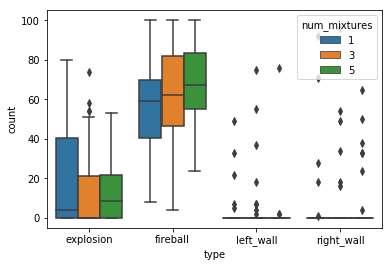

In [12]:
import pandas as pd
import seaborn as sns
#print(events_dicts)
events_frame= pd.DataFrame(events_dicts)
sns.boxplot(x="type", y="count", hue="num_mixtures", data=events_frame)



## Analyzing difference between predicted and actual events

In [39]:
from test_creativity_stability import count_different_events_in_images
num_independent_tests = 100
warm_up_length = 100
num_dream_timesteps=100
events_dicts=[]
for j in range(num_independent_tests):
    print("Step ", j)
    #Getting a random conditioning sequence to start the RNN.
    
    latent_sequence, action_sequence = get_random_starting_sequence(warm_up_length+num_dream_timesteps+1)
    
    for num_mixtures in rnn_analyzers.keys():
        
        #For each trained model
        for rnn_analyzer in rnn_analyzers[num_mixtures]:
            rnn_analyzer._reset()
            rnn_analyzer.warm_up_lstm(action_sequence[:warm_up_length], latent_sequence[:warm_up_length])
            dreamed_latents = []
            actual_latents = []
            dreamed_latent, mixture_weights = rnn_analyzer.predict_one_step(action_sequence[warm_up_length], previous_z=latent_sequence[warm_up_length], sigma_temp=SIGMA_TEMP)
            actual_latents.append(latent_sequence[warm_up_length+1])
            dreamed_latents.append(dreamed_latent)
            for dream_step in range(num_dream_timesteps-1):
                dreamed_latent, mixture_weights = rnn_analyzer.predict_one_step(action_sequence[warm_up_length+dream_step], previous_z=latent_sequence[warm_up_length+dream_step], sigma_temp=SIGMA_TEMP)
                dreamed_latents.append(dreamed_latent)
                actual_latents.append(latent_sequence[warm_up_length+dream_step+1])
            
            actual_images = rnn_analyzer.decode_with_vae(actual_latents)
            dreamed_images = rnn_analyzer.decode_with_vae(dreamed_latents)
            events_dict = count_different_events_in_images(actual_images, dreamed_images)
            events_dict["num_mixtures"] = num_mixtures
            events_dicts.append(events_dict)

Step  0
Step  1
Step  2
Step  3
Step  4
Step  5
Step  6
Step  7
Step  8
Step  9
Step  10
Step  11
Step  12
Step  13
Step  14
Step  15
Step  16
Step  17
Step  18
Step  19
Step  20
Step  21
Step  22
Step  23
Step  24
Step  25
Step  26
Step  27
Step  28
Step  29
Step  30
Step  31
Step  32
Step  33
Step  34
Step  35
Step  36
Step  37
Step  38
Step  39
Step  40
Step  41
Step  42
Step  43
Step  44
Step  45
Step  46
Step  47
Step  48
Step  49
Step  50
Step  51
Step  52
Step  53
Step  54
Step  55
Step  56
Step  57
Step  58
Step  59
Step  60
Step  61
Step  62
Step  63
Step  64
Step  65
Step  66
Step  67
Step  68
Step  69
Step  70
Step  71
Step  72
Step  73
Step  74
Step  75
Step  76
Step  77
Step  78
Step  79
Step  80
Step  81
Step  82
Step  83
Step  84
Step  85
Step  86
Step  87
Step  88
Step  89
Step  90
Step  91
Step  92
Step  93
Step  94
Step  95
Step  96
Step  97
Step  98
Step  99


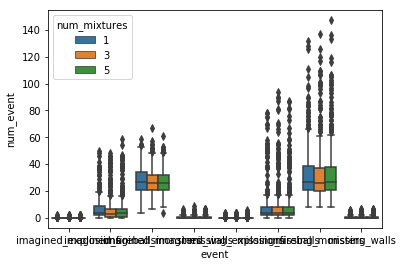

In [44]:
import pandas as pd
import seaborn as sns
#print(events_dicts)
events_frame= pd.DataFrame(events_dicts)
melted = pd.melt(events_frame, id_vars=["num_mixtures"], 
                 var_name="event", value_name="num_event")
#print(melted)
sns.boxplot(x="event", y="num_event", hue="num_mixtures", data=melted)#, hue="num_mixtures", data=events_frame)

In [45]:
imagined_frame = events_frame.filter(regex='imagined')
missed_frame = events_frame.filter(regex='missing')
imagined_frame['num_mixtures'] = events_frame['num_mixtures']
missed_frame['num_mixtures'] = events_frame['num_mixtures']
melted_imagined = pd.melt(imagined_frame, id_vars=["num_mixtures"], 
                 var_name="event", value_name="num_event")
melted_missing = pd.melt(missed_frame, id_vars=["num_mixtures"], 
                 var_name="event", value_name="num_event")

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


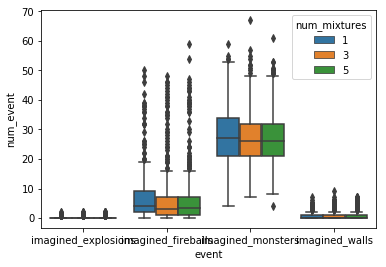

In [46]:
sns.boxplot(x="event", y="num_event", hue="num_mixtures", data=melted_imagined)

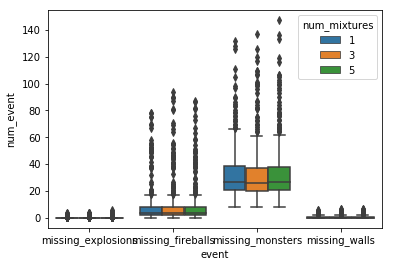

In [47]:
sns.boxplot(x="event", y="num_event", hue="num_mixtures", data=melted_missing)